In [1]:
import os
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sys
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

project_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_path)
from src.preprocessing import SpectralAngleMapper,MNFTransform,PixelPurityIndex

In [2]:
# 1. przykładowy obraz
data = sio.loadmat('../data/data/Indian_pines_data.mat')
gt_data = sio.loadmat('../data/gt/Indian_pines_gt.mat')

# Przypisanie danych do zmiennych
hyper_data = data[list(data.keys())[-1]]  # Zakładam, że ostatni klucz to dane
ground_truth = gt_data[list(gt_data.keys())[-1]]  # Zakładam, że ostatni klucz to ground truth

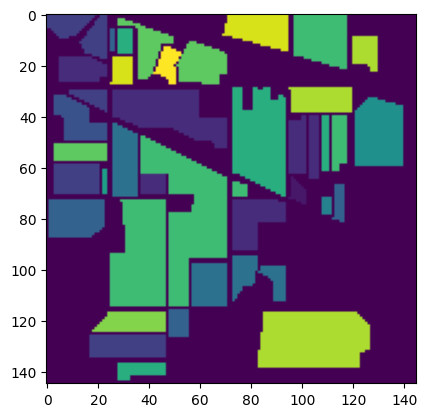

In [3]:
plt.imshow(ground_truth)
plt.show()

### PCA

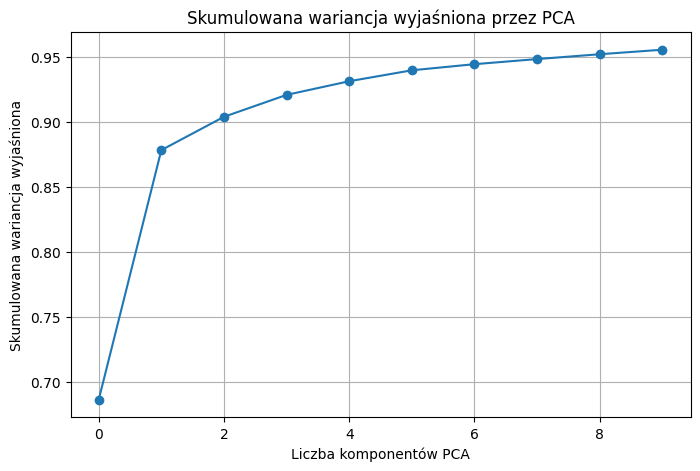

In [4]:
reshaped_image = hyper_data.reshape(hyper_data.shape[0] * hyper_data.shape[1], hyper_data.shape[2])
reshaped_ground_truth = ground_truth.reshape(ground_truth.shape[0] * ground_truth.shape[1])

scaler = StandardScaler()

data_normalized = scaler.fit_transform(reshaped_image)

# PCA jako krok MNF
pca = PCA(n_components=10)
mnf_result = pca.fit_transform(data_normalized)

# Wykres wariancji wyjaśnionej przez PCA
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Liczba komponentów PCA")
plt.ylabel("Skumulowana wariancja wyjaśniona")
plt.title("Skumulowana wariancja wyjaśniona przez PCA")
plt.grid()
plt.show()

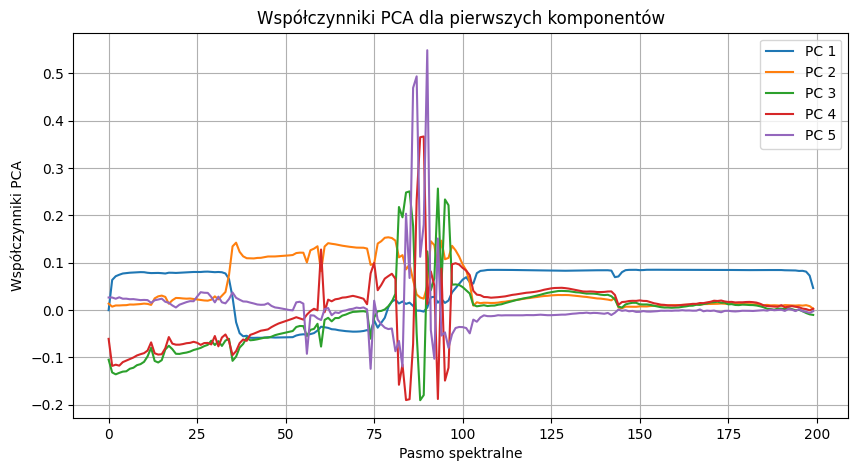

In [5]:
plt.figure(figsize=(10, 5))
for i in range(5):  # Rysujemy pierwsze 5 komponentów
    plt.plot(pca.components_[i], label=f'PC {i+1}')

plt.xlabel("Pasmo spektralne")
plt.ylabel("Współczynniki PCA")
plt.title("Współczynniki PCA dla pierwszych komponentów")
plt.legend()
plt.grid()
plt.show()

### MNF

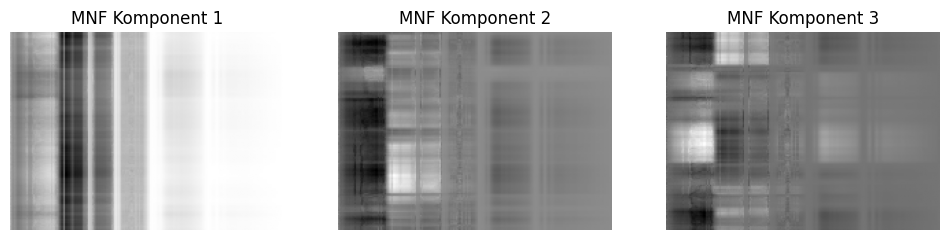

In [6]:
mnf = MNFTransform(num_components=10)
mnf.fit(hyper_data)

# # 🔹 Inferencja na nowym obrazie (bez ponownego trenowania)
# new_hyperspectral_image = np.random.rand(200, 145, 145)  # Nowe dane
mnf_result = mnf.transform(hyper_data)

# 🔹 Wizualizacja pierwszych 3 komponentów MNF
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    axes[i].imshow(mnf_result[i, :, :], cmap="gray")
    axes[i].set_title(f"MNF Komponent {i+1}")
    axes[i].axis("off")
plt.show()

### PPI

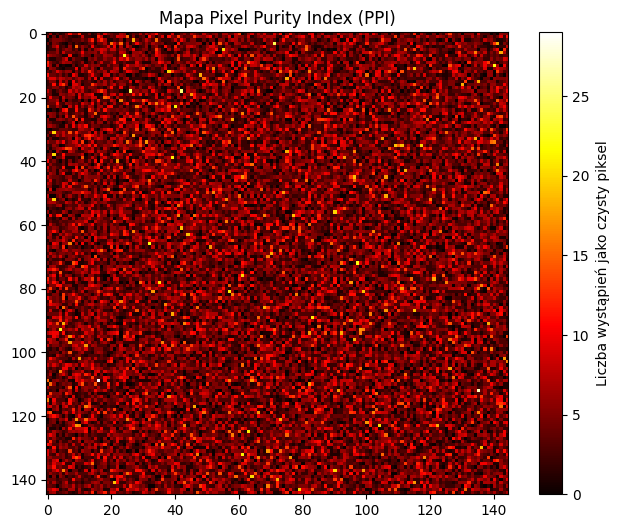

In [10]:
np.random.seed(42)
hyperspectral_image = np.random.rand(200, 145, 145)  

# 🔹 Uruchomienie algorytmu PPI
ppi = PixelPurityIndex(num_projections=50000,num_endmembers=50)
ppi_image,endmembers = ppi.fit(hyperspectral_image)

# 🔹 Wizualizacja wyników
plt.figure(figsize=(8, 6))
plt.imshow(ppi_image, cmap='hot', interpolation='nearest')
plt.colorbar(label="Liczba wystąpień jako czysty piksel")
plt.title("Mapa Pixel Purity Index (PPI)")
plt.show()

### SAM // raczej źle

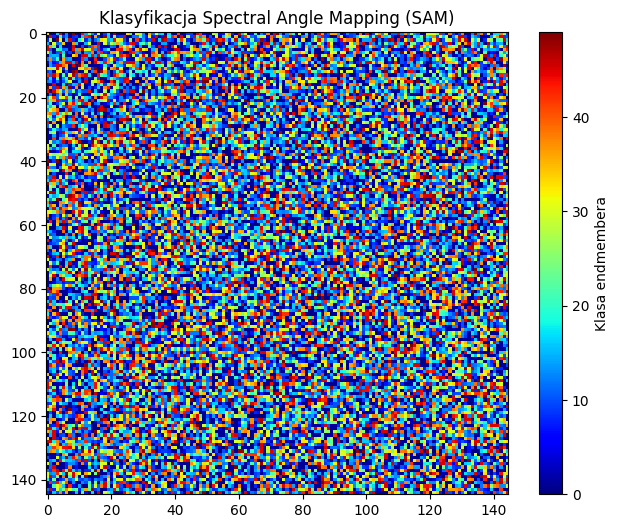

In [11]:
sam = SpectralAngleMapper(endmembers)
sam.fit(hyperspectral_image)
sam_image = sam.get_sam_image()

# 🔹 Wizualizacja wyników
plt.figure(figsize=(8, 6))
plt.imshow(sam_image, cmap='jet', interpolation='nearest')
plt.colorbar(label="Klasa endmembera")
plt.title("Klasyfikacja Spectral Angle Mapping (SAM)")
plt.show()